In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.stats import spearmanr
import requests
from scipy import stats
import seaborn as sns

county_df = pd.read_csv("group-1-project-1/Resources/county_data.csv")
state_df = pd.read_csv("group-1-project-1/Resources/state_data.csv")

In [2]:
#Connecting to Census API for Median Household Income data
url = "https://api.census.gov/data/2021/acs/acs5"
params = {
    "get": "NAME,B19013_001E",  # State name and Median Household Income
    "for": "state:*",            # Get data for all states
    "key": "a27f97646f67c4b2113c6197a9c4072638f37cff"       # Your API key
}
response = requests.get(url, params=params)
data = response.json()
median_inc = pd.DataFrame(data)
median_inc = median_inc.drop(0)
median_inc = median_inc.drop(52)
median_inc[1] = pd.to_numeric(median_inc[1], errors='coerce')

In [3]:
county_df = county_df.dropna()

**LINEAR REGRESSION PLOTS**

Please copy the cell below to main - ty!

The r-squared is: 0.40278071357022127


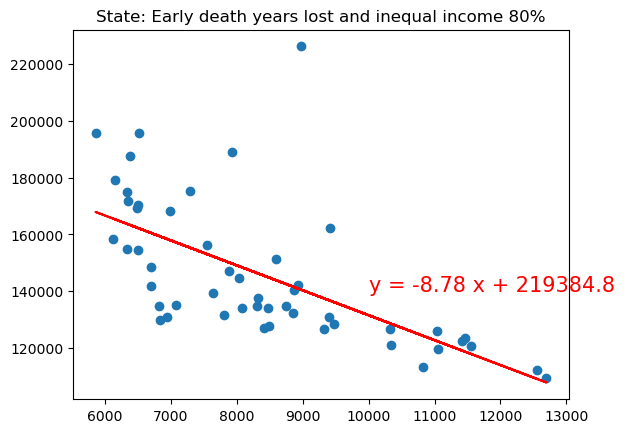

The r-squared is: 0.6371006888391599


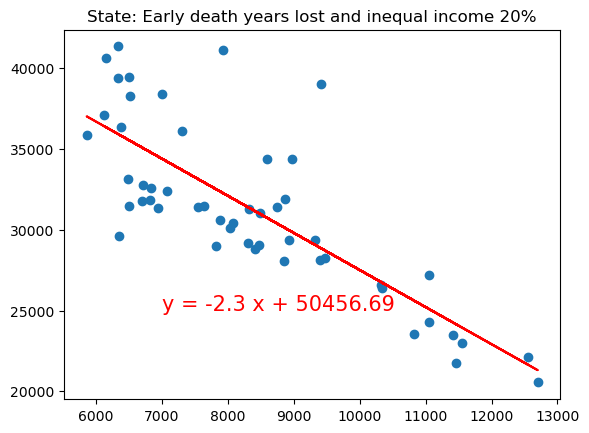

The r-squared is: 0.04981662455258389


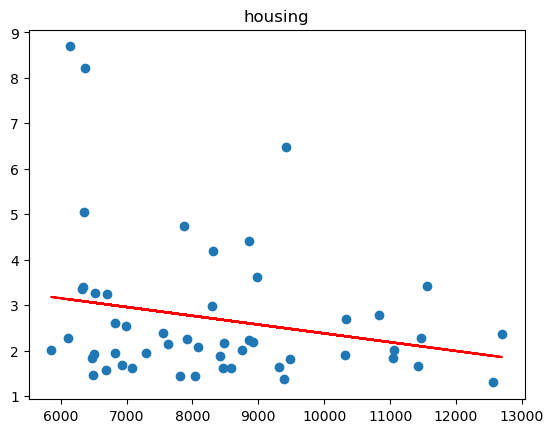

In [6]:
# Define a function to create Linear Regression plots
def plot_linear_regress(x, y, title, text_coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    
# Build scatter plot for early death years and inequal income 80% - CORRELATION IS FAIR SO IT WILL BE USED FOR FURTHER ANALYSIS
x = state_df['early_death_years_lost']
y= state_df['income_inequal_80pct']
title = "State: Early death years lost and inequal income 80%"
text_coordinates = (10000,140000)
plot_linear_regress(x, y, title, text_coordinates)

# Build scatter plot for early death years and inequal income 20% - CORRELATION IS FAIRLY GOOD SO IT WILL BE USED FOR FURTHER ANALYSIS
x = state_df['early_death_years_lost']
y= state_df['income_inequal_20pct']
title = "State: Early death years lost and inequal income 20%"
text_coordinates = (7000,25000)
plot_linear_regress(x, y, title, text_coordinates)

#Checking for housing data in comparison to early death years lost - CORRELATION IS WEAK SO IT WILL NOT BE USED FOR FURTHER ANALYSIS
x = state_df['early_death_years_lost']
y= state_df['housing_overcrowding']
title = "housing"
text_coordinates = (7000,25000)
plot_linear_regress(x, y, title, text_coordinates)

**SHAPIRO-WILK TEST**

In [8]:
#Early Death Years Lost
stat, p_value = stats.shapiro(state_df['early_death_years_lost'])

print('Shapiro-Wilk Test Statistic:', stat)
print('P-value:', p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Early Death Years Lost is normally distributed.")

#Early Death Years Lost
stat, p_value = stats.shapiro(state_df['income_inequal_80pct'])

print('Shapiro-Wilk Test Statistic:', stat)
print('P-value:', p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Income at 80th percentile is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Income at 80th percentile is normally distributed.")

Shapiro-Wilk Test Statistic: 0.9263328976786037
P-value: 0.0036116628297930306
Reject the null hypothesis: Data is not normally distributed.
Shapiro-Wilk Test Statistic: 0.9173977894126759
P-value: 0.001690463460101876
Reject the null hypothesis: Income at 80th percentile is not normally distributed.


**SPEARMAN CORRELATION TEST**

In [10]:
#Spearman correlation testing for income inequal 80%
corr_coefficient, p_value = spearmanr(state_df['early_death_years_lost'], state_df['income_inequal_80pct'])

print('Spearman Correlation Coefficient:', corr_coefficient)
print('P-value:', p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant monotonic relationship exists between early death years lost and income at the 80th percentile.")
else:
    print("Fail to reject the null hypothesis: No significant monotonic relationship between early death years lost and income at the 80th percentile.")

#Spearman correlation testing for income inequal 20%
corr_coefficient, p_value = spearmanr(state_df['early_death_years_lost'], state_df['income_inequal_20pct'])

print('Spearman Correlation Coefficient:', corr_coefficient)
print('P-value:', p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant monotonic relationship exists between early death years lost and income at the 20th percentile.")
else:
    print("Fail to reject the null hypothesis: No significant monotonic relationship between early death years lost and income at the 20th percentile.")

Spearman Correlation Coefficient: -0.7570307022458402
P-value: 1.2956288418817847e-10
Reject the null hypothesis: Significant monotonic relationship exists between early death years lost and income at the 80th percentile.
Spearman Correlation Coefficient: -0.7743891402714933
P-value: 2.6252318611349003e-11
Reject the null hypothesis: Significant monotonic relationship exists between early death years lost and income at the 20th percentile.


**PULLING IN CENSUS API FOR MEDIAN HOUSEHOLD INCOME**

The r-squared is: 0.5536843632844494


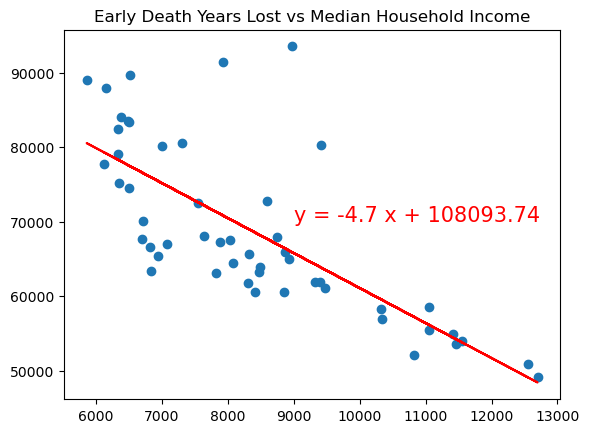

In [12]:
#Checking against median hosuehold income
x = state_df['early_death_years_lost']
y = median_inc[1]
title = "Early Death Years Lost vs Median Household Income"
text_coordinates = (9000,70000)
plot_linear_regress(x, y, title, text_coordinates)

In [63]:
#Filter state dataframe by selecting the columns that only have correlation
new_state_df = state_df[['state','early_death_years_lost','income_inequal_20pct', 
                         'income_inequal_80pct', 'poor_physical_health_avg_days', 
                         'food_environment_index', 'exercise_access_pct', 'adult_obesity_pct']]

#Determine the top 10 states that have the highest early death years lost (least favorable)
sorted = new_state_df.sort_values(by='early_death_years_lost', ascending=False)
high_10 = sorted.head(10)

sorted2 = new_state_df.sort_values(by='early_death_years_lost')
low_10 = sorted2.head(10)

In [45]:
#Filter state dataframe by selecting the columns that only have correlation
new_state_df = state_df[['state','early_death_years_lost','income_inequal_20pct', 
                         'income_inequal_80pct', 'poor_physical_health_avg_days', 
                         'food_environment_index', 'exercise_access_pct', 'adult_obesity_pct']]

#Determine the top 10 states that have the highest early death years lost (least favorable)
sorted = new_state_df.sort_values(by='early_death_years_lost', ascending=False)
high_10 = sorted.head(10)

sorted2 = new_state_df.sort_values(by='early_death_years_lost')
low_10 = sorted2.head(10)

variables = [
    'income_inequal_20pct',
    'income_inequal_80pct',
    'poor_physical_health_avg_days',
    'food_environment_index',
    'exercise_access_pct',
    'adult_obesity_pct'
]

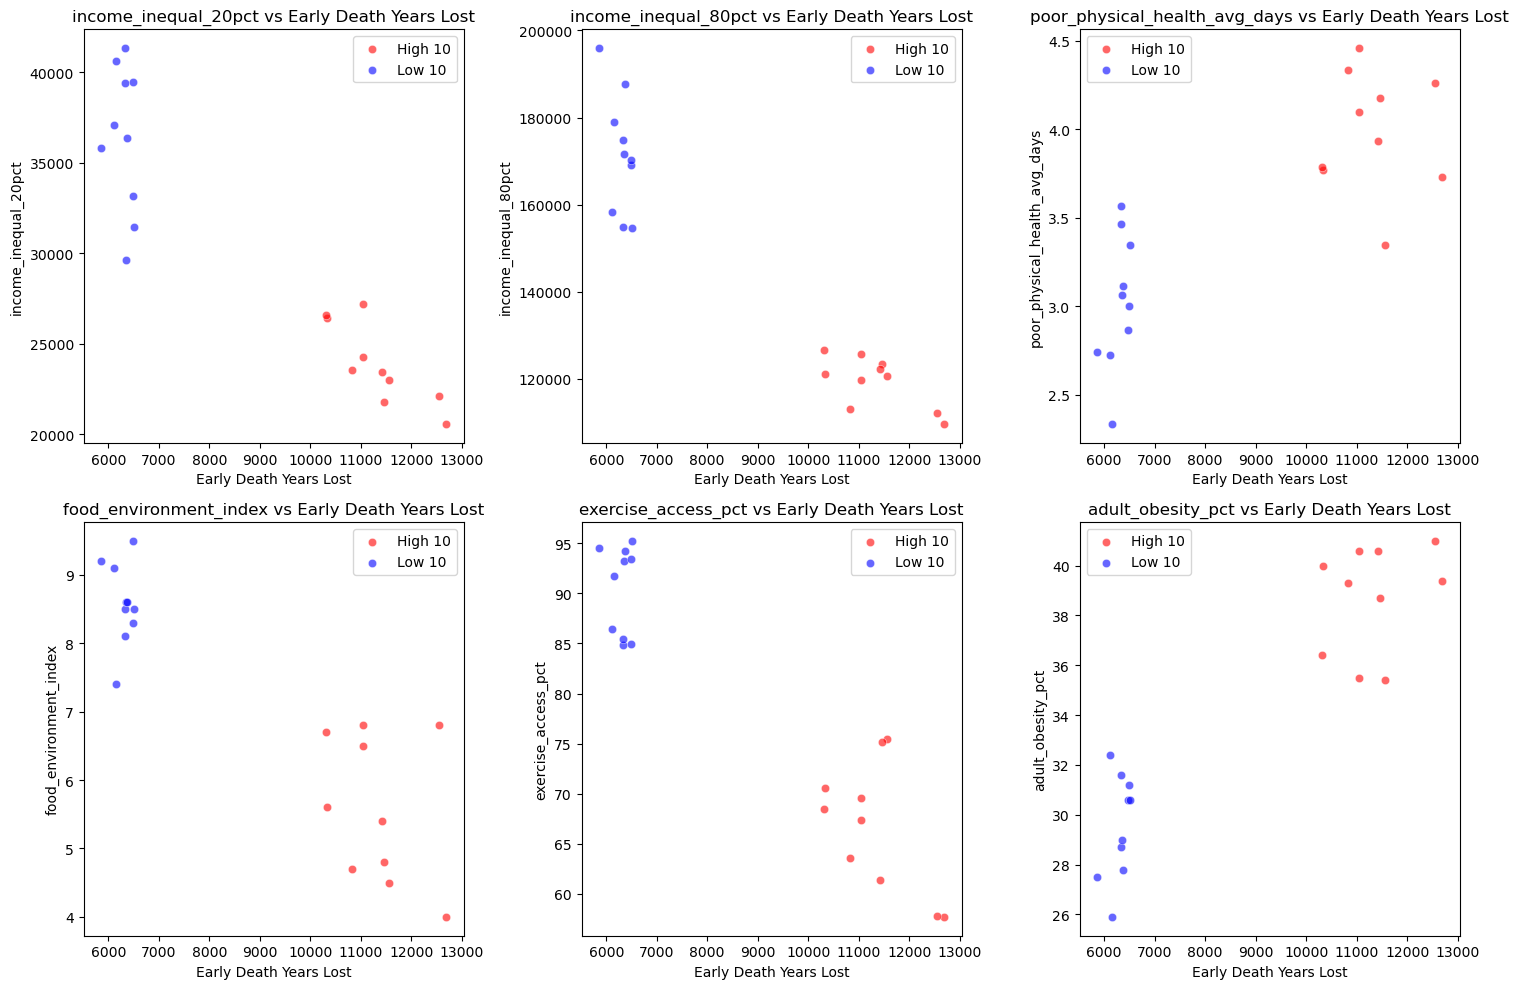

In [57]:
# Create scatter plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=high_10, x='early_death_years_lost', y=var, color='red', label='High 10', alpha=0.6)
    sns.scatterplot(data=low_10, x='early_death_years_lost', y=var, color='blue', label='Low 10', alpha=0.6)
    
    plt.title(f'{var} vs Early Death Years Lost')
    plt.xlabel('Early Death Years Lost')
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

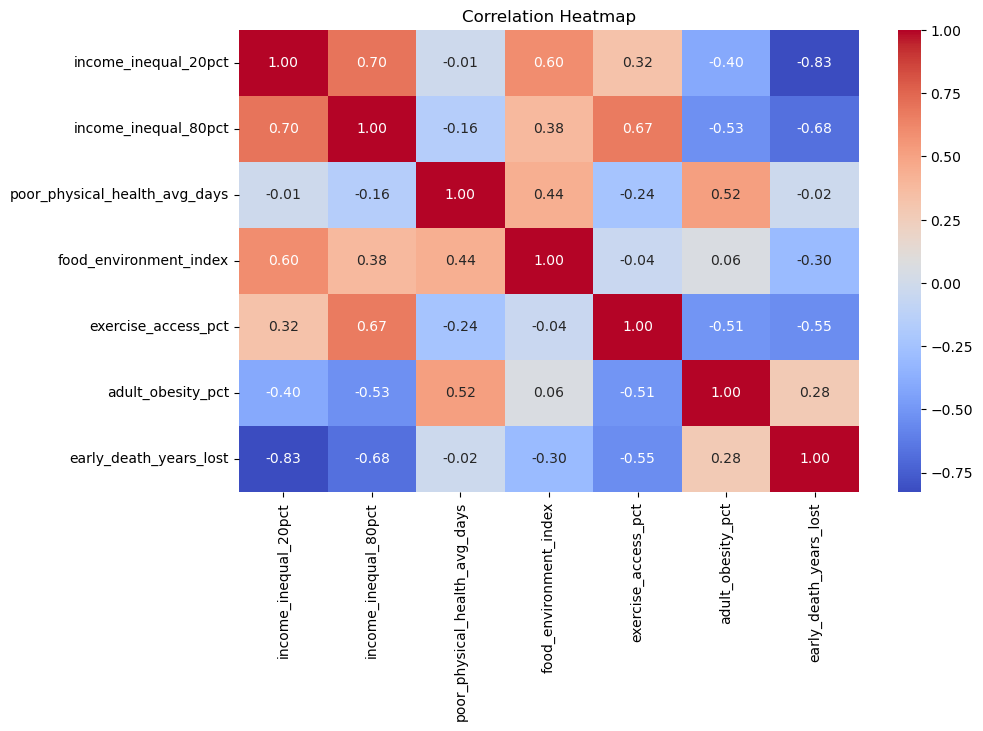

In [27]:
# Compute the correlation matrix
correlation_matrix = high_10[variables + ['early_death_years_lost']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

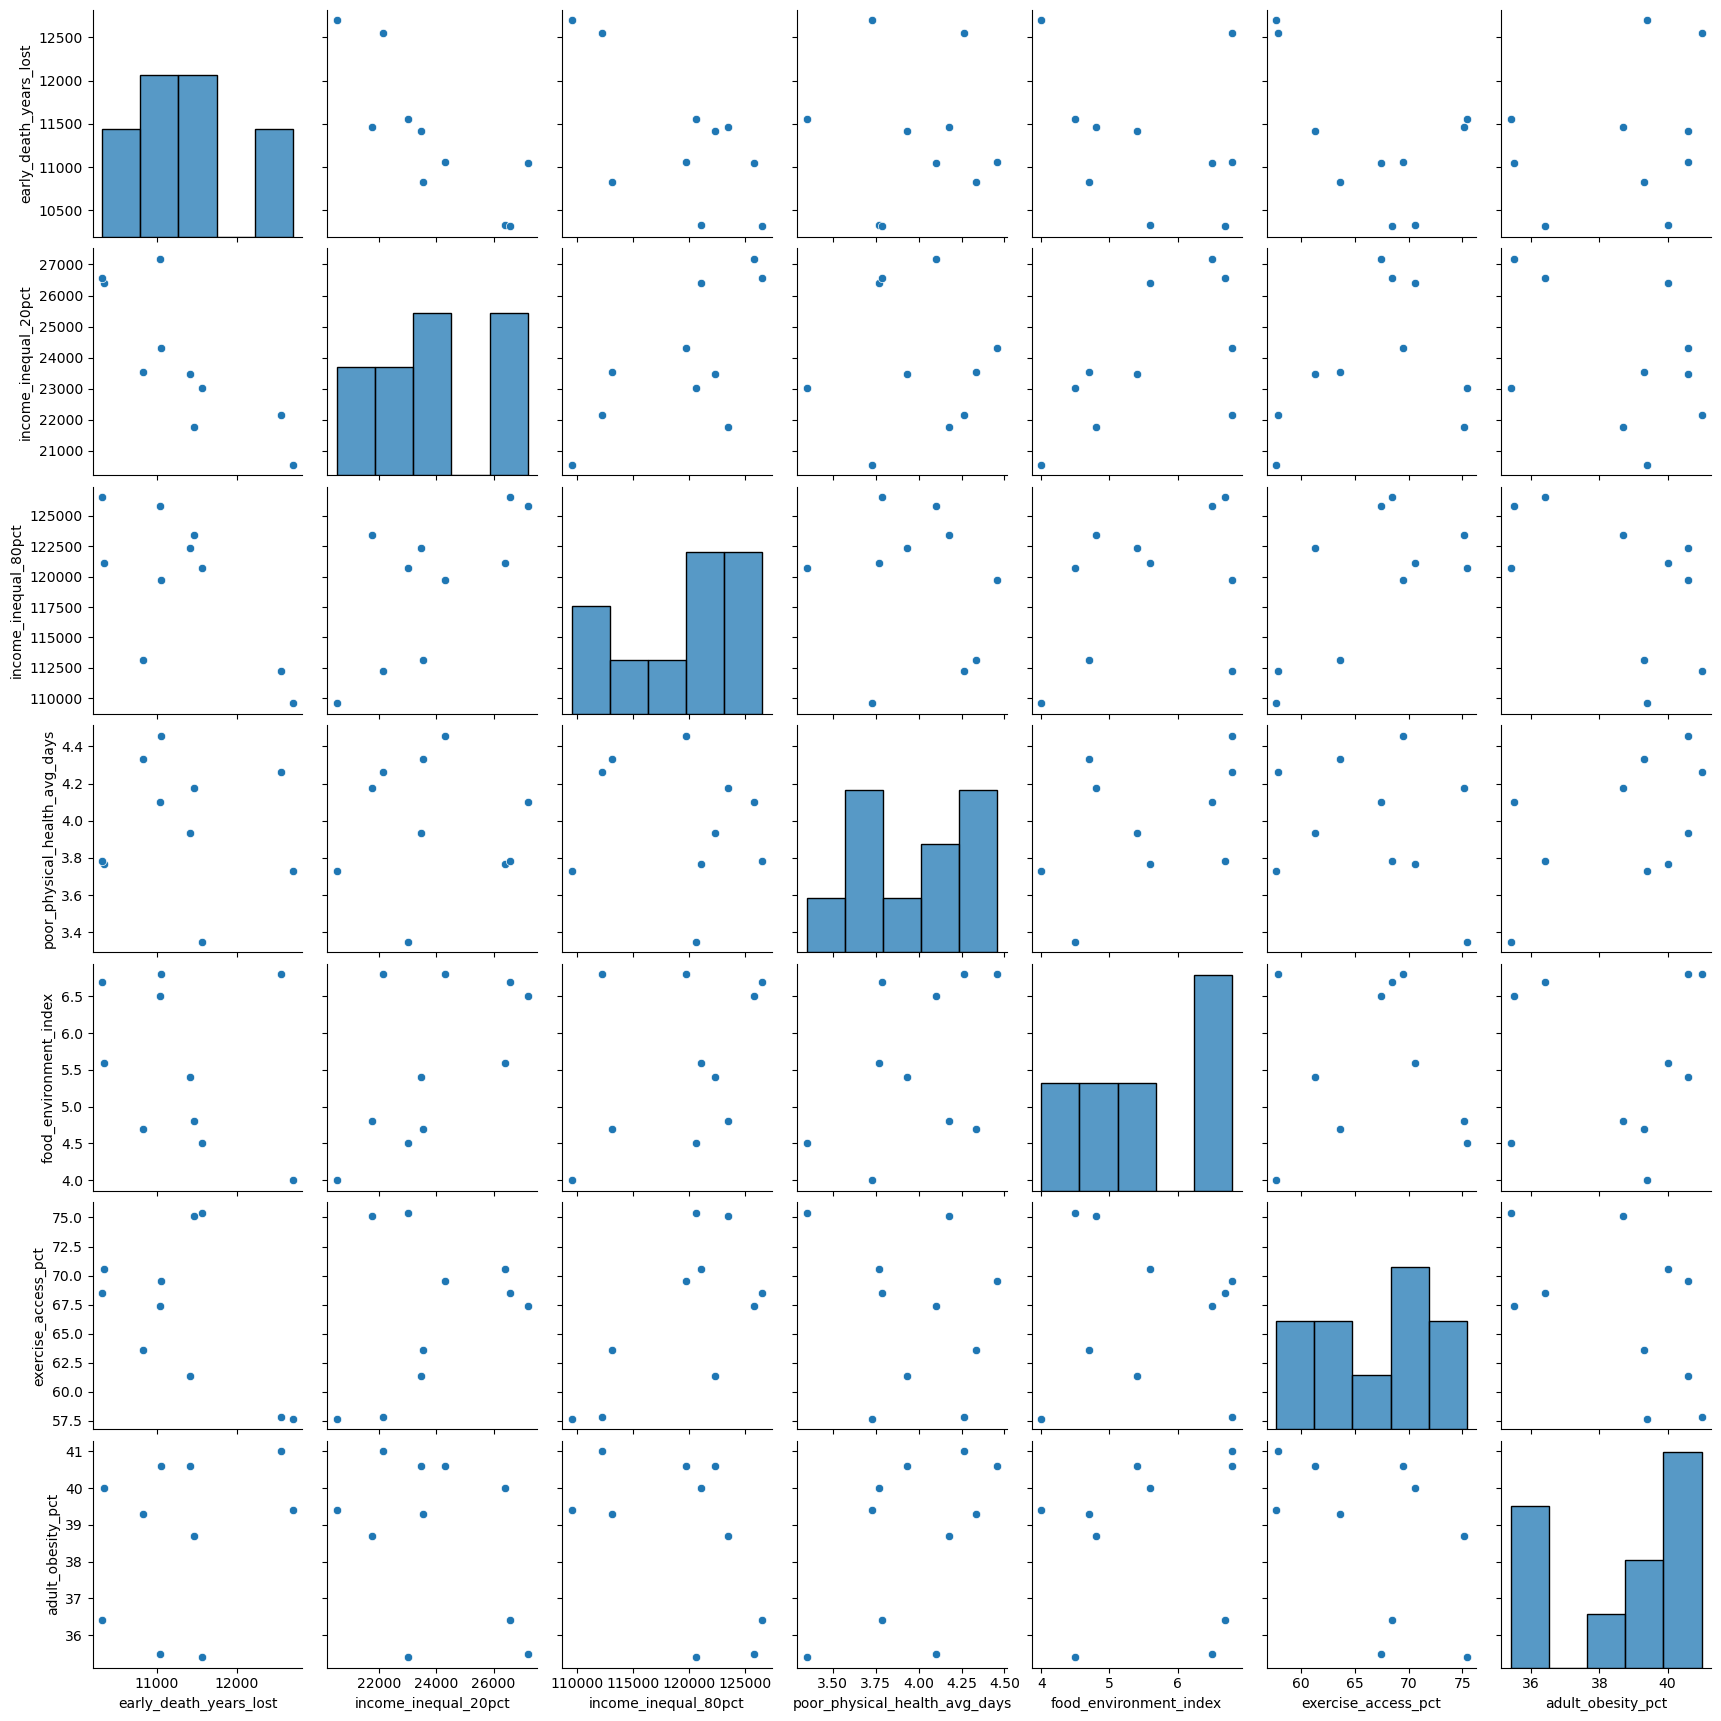

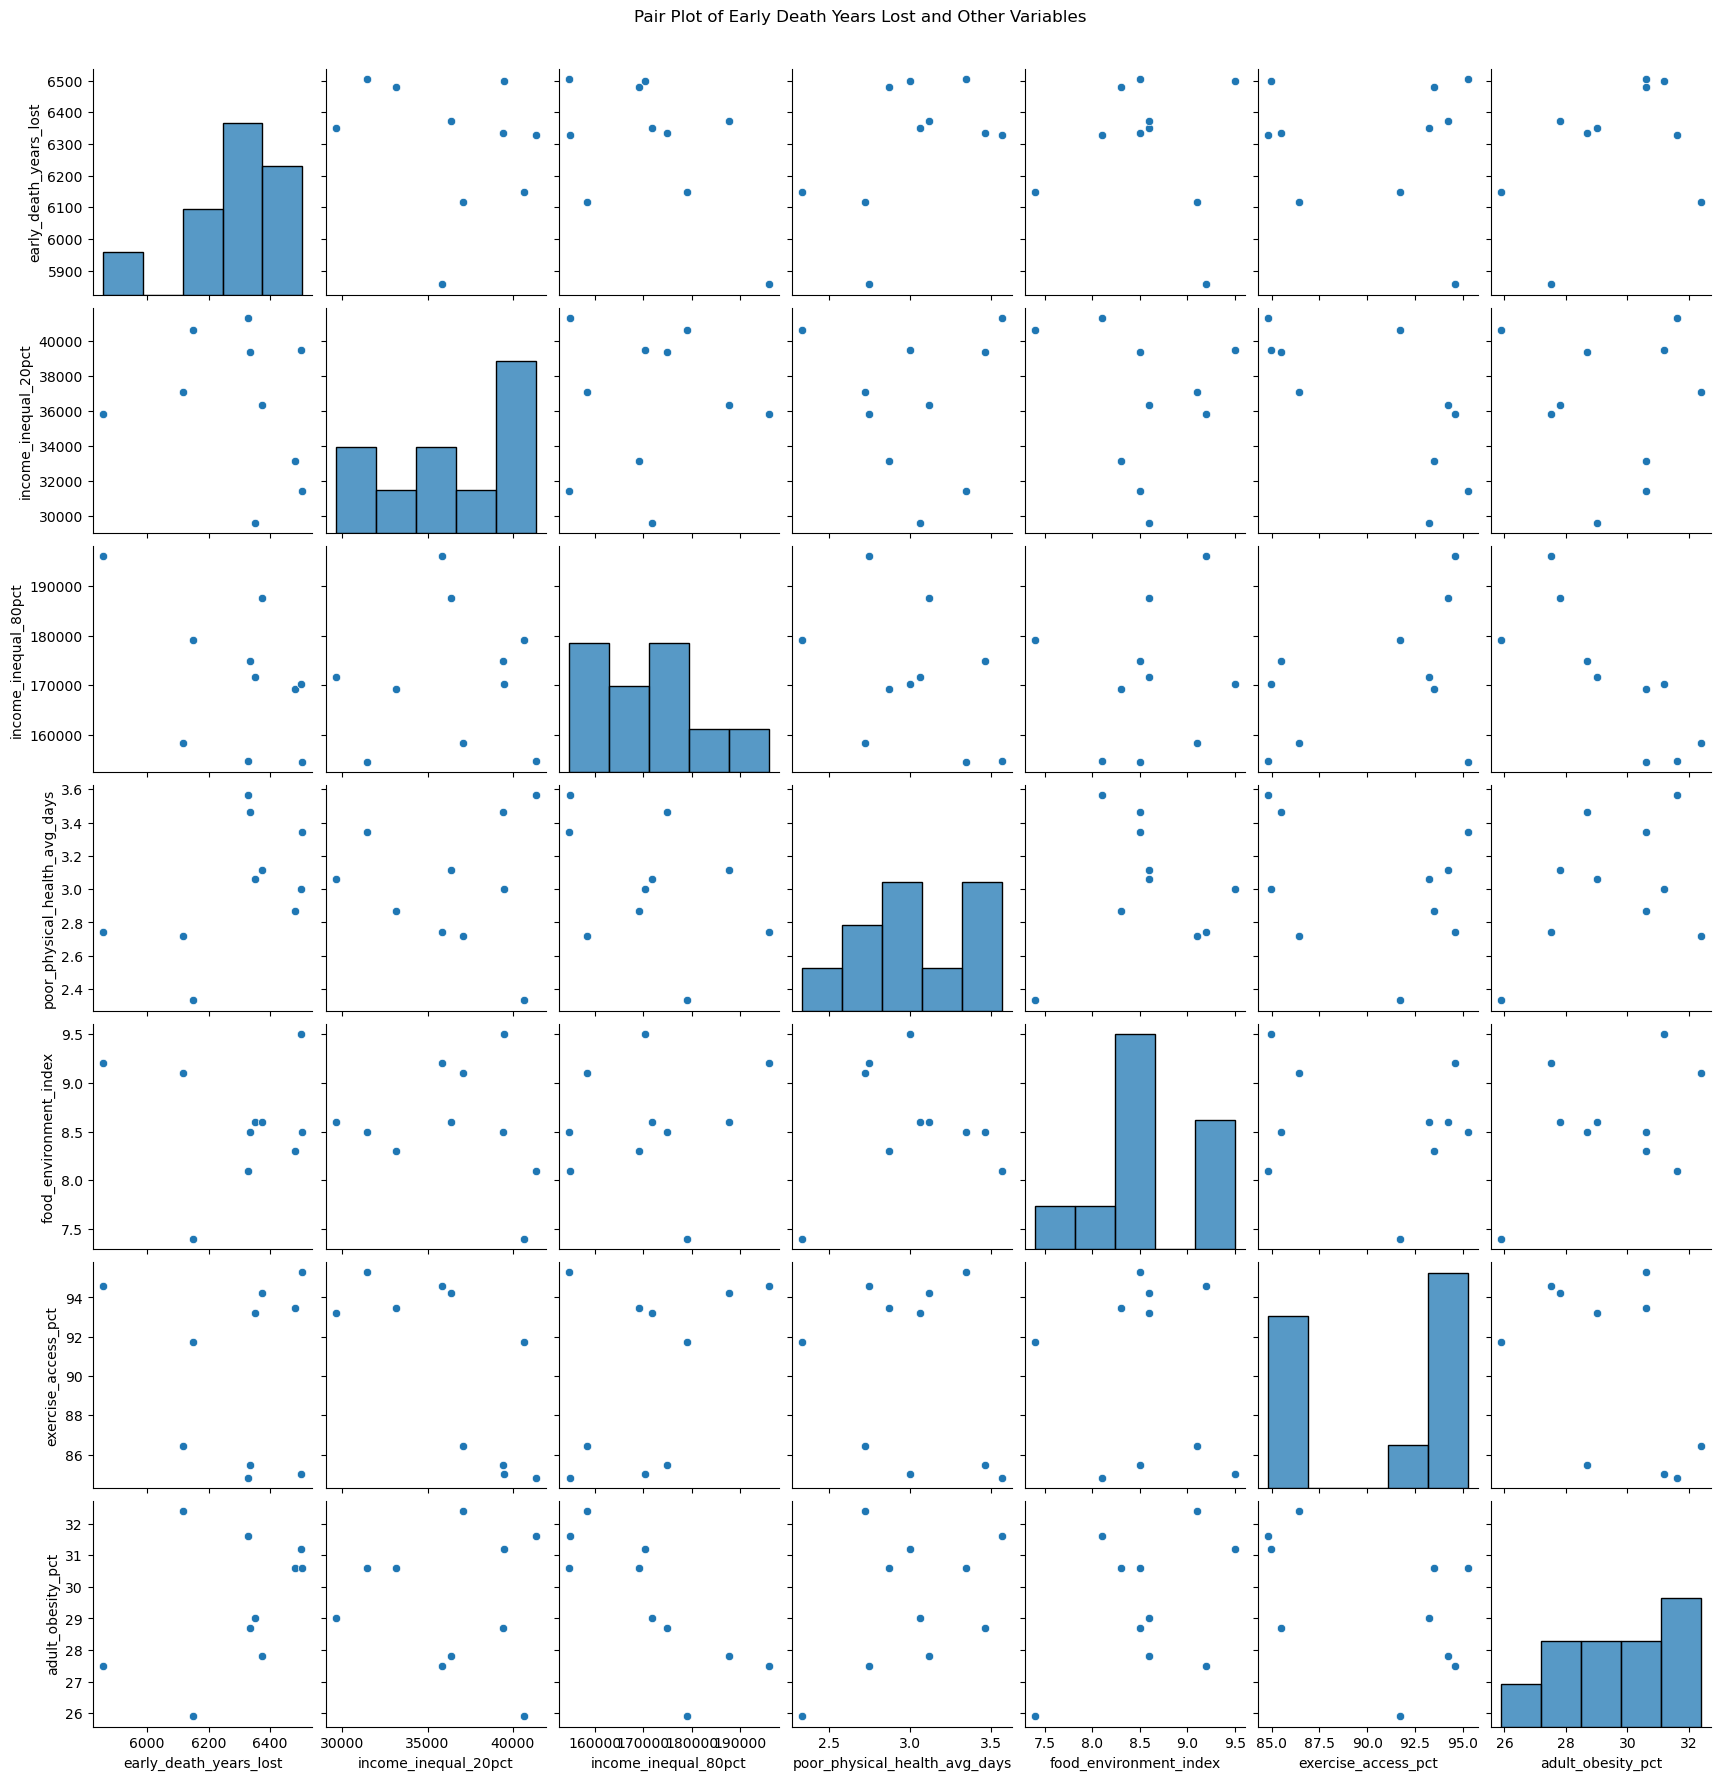

In [47]:
# Creating a pair plot
sns.pairplot(high_10, vars=['early_death_years_lost'] + variables)
sns.pairplot(low_10, vars=['early_death_years_lost'] + variables)
plt.suptitle('Pair Plot of Early Death Years Lost and Other Variables', y=1.02)
plt.show()

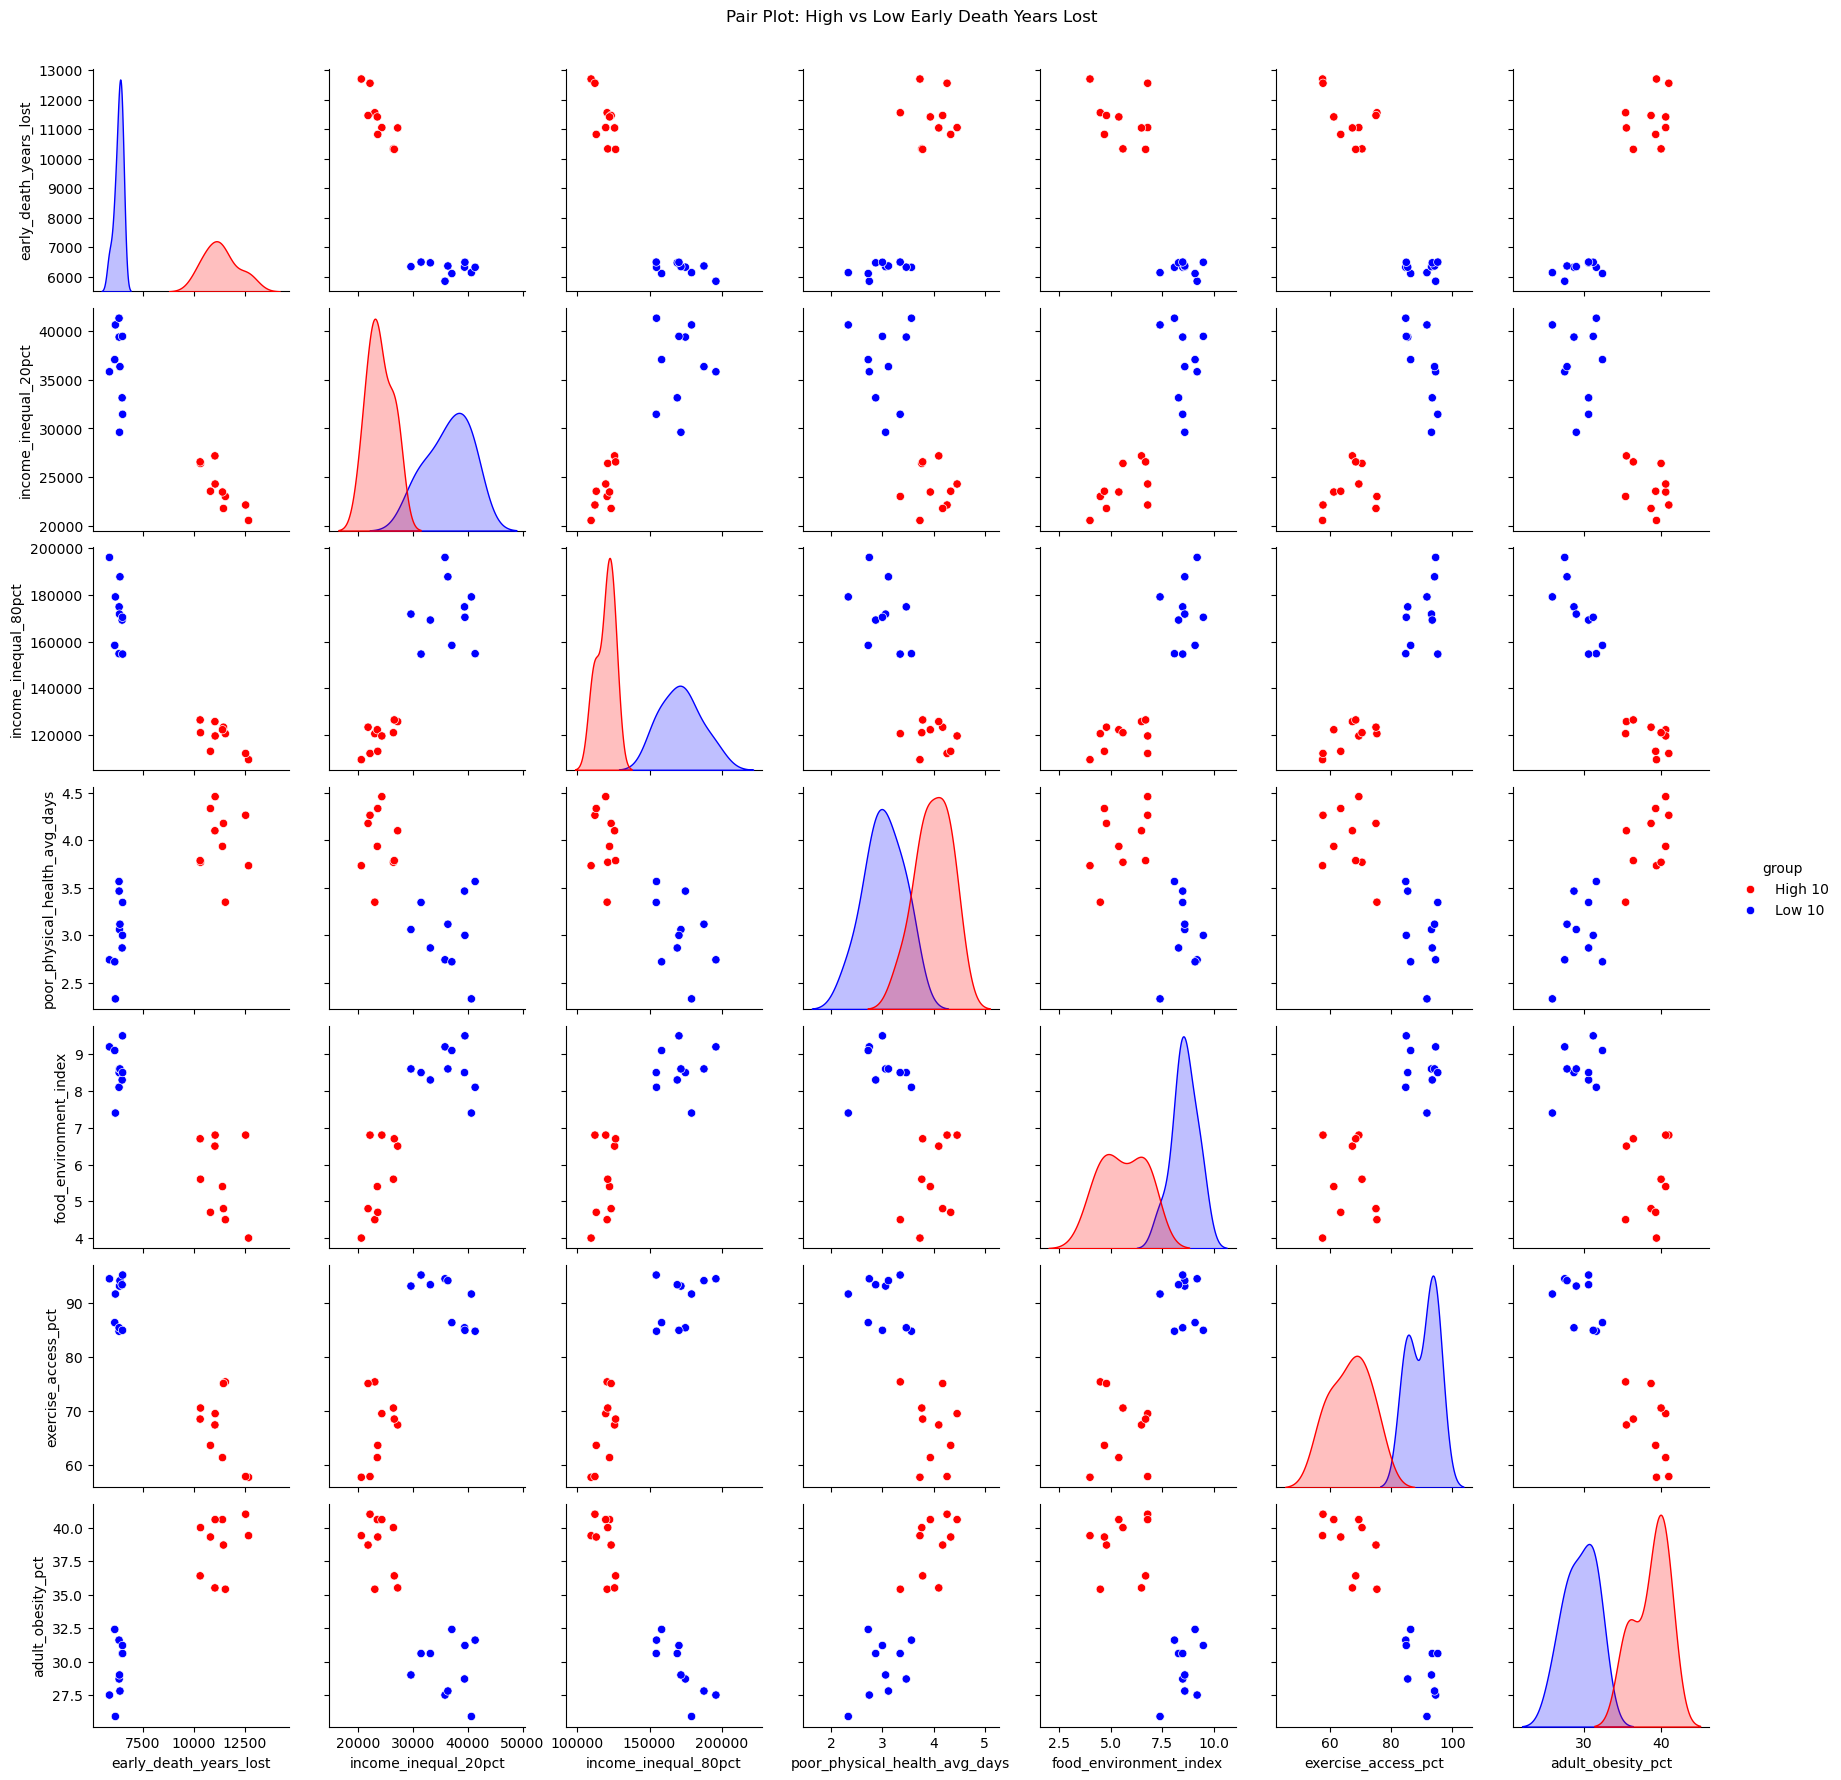

In [61]:
# Creating a pair plot
# Add a column to indicate the group
high_10.loc[:, 'group'] = 'High 10'
low_10.loc[:, 'group'] = 'Low 10'

# Combine the two DataFrames
combined = pd.concat([high_10, low_10])

# Define a custom color palette
custom_palette = {'High 10': 'red', 'Low 10': 'blue'}

# Create a pair plot
sns.pairplot(combined, hue='group', vars=['early_death_years_lost', 'income_inequal_20pct',
    'income_inequal_80pct',
    'poor_physical_health_avg_days',
    'food_environment_index',
    'exercise_access_pct',
    'adult_obesity_pct'],
     palette=custom_palette)
plt.suptitle('Pair Plot: High vs Low Early Death Years Lost', y=1.02)
plt.show()

In [85]:
#Adding region to df
region_df = new_state_df.copy()

region_mapping = {'Alabama': 'South', 'Alaska': 'West', 'Arizona': 'West', 'Arkansas': 'South', 'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'Northeast', 'Florida': 'South', 'Georgia': 'South', 'Hawaii': 'West', 'Idaho': 'West', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Kentucky': 'South', 'Louisiana': 'South', 'Maine': 'Northeast', 'Maryland': 'Northeast', 'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota': 'Midwest', 'Mississippi': 'South', 'Missouri': 'Midwest', 'Montana': 'West', 'Nebraska': 'Midwest', 'Nevada': 'West', 'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New Mexico': 'West', 'New York': 'Northeast', 'North Carolina': 'South', 'North Dakota': 'Midwest', 'Ohio': 'Midwest', 'Oklahoma': 'South', 'Oregon': 'West', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'South Carolina': 'South', 'South Dakota': 'Midwest', 'Tennessee': 'South', 'Texas': 'South', 'Utah': 'West', 'Vermont': 'Northeast', 'Virginia': 'South', 'Washington': 'West', 'West Virginia': 'South', 'Wisconsin': 'Midwest', 'Wyoming': 'West'}

# Add a new column for the region
region_df['region'] = region_df['state'].map(region_mapping)

# Sort the DataFrame by region
region_df = region_df.sort_values(by='region')

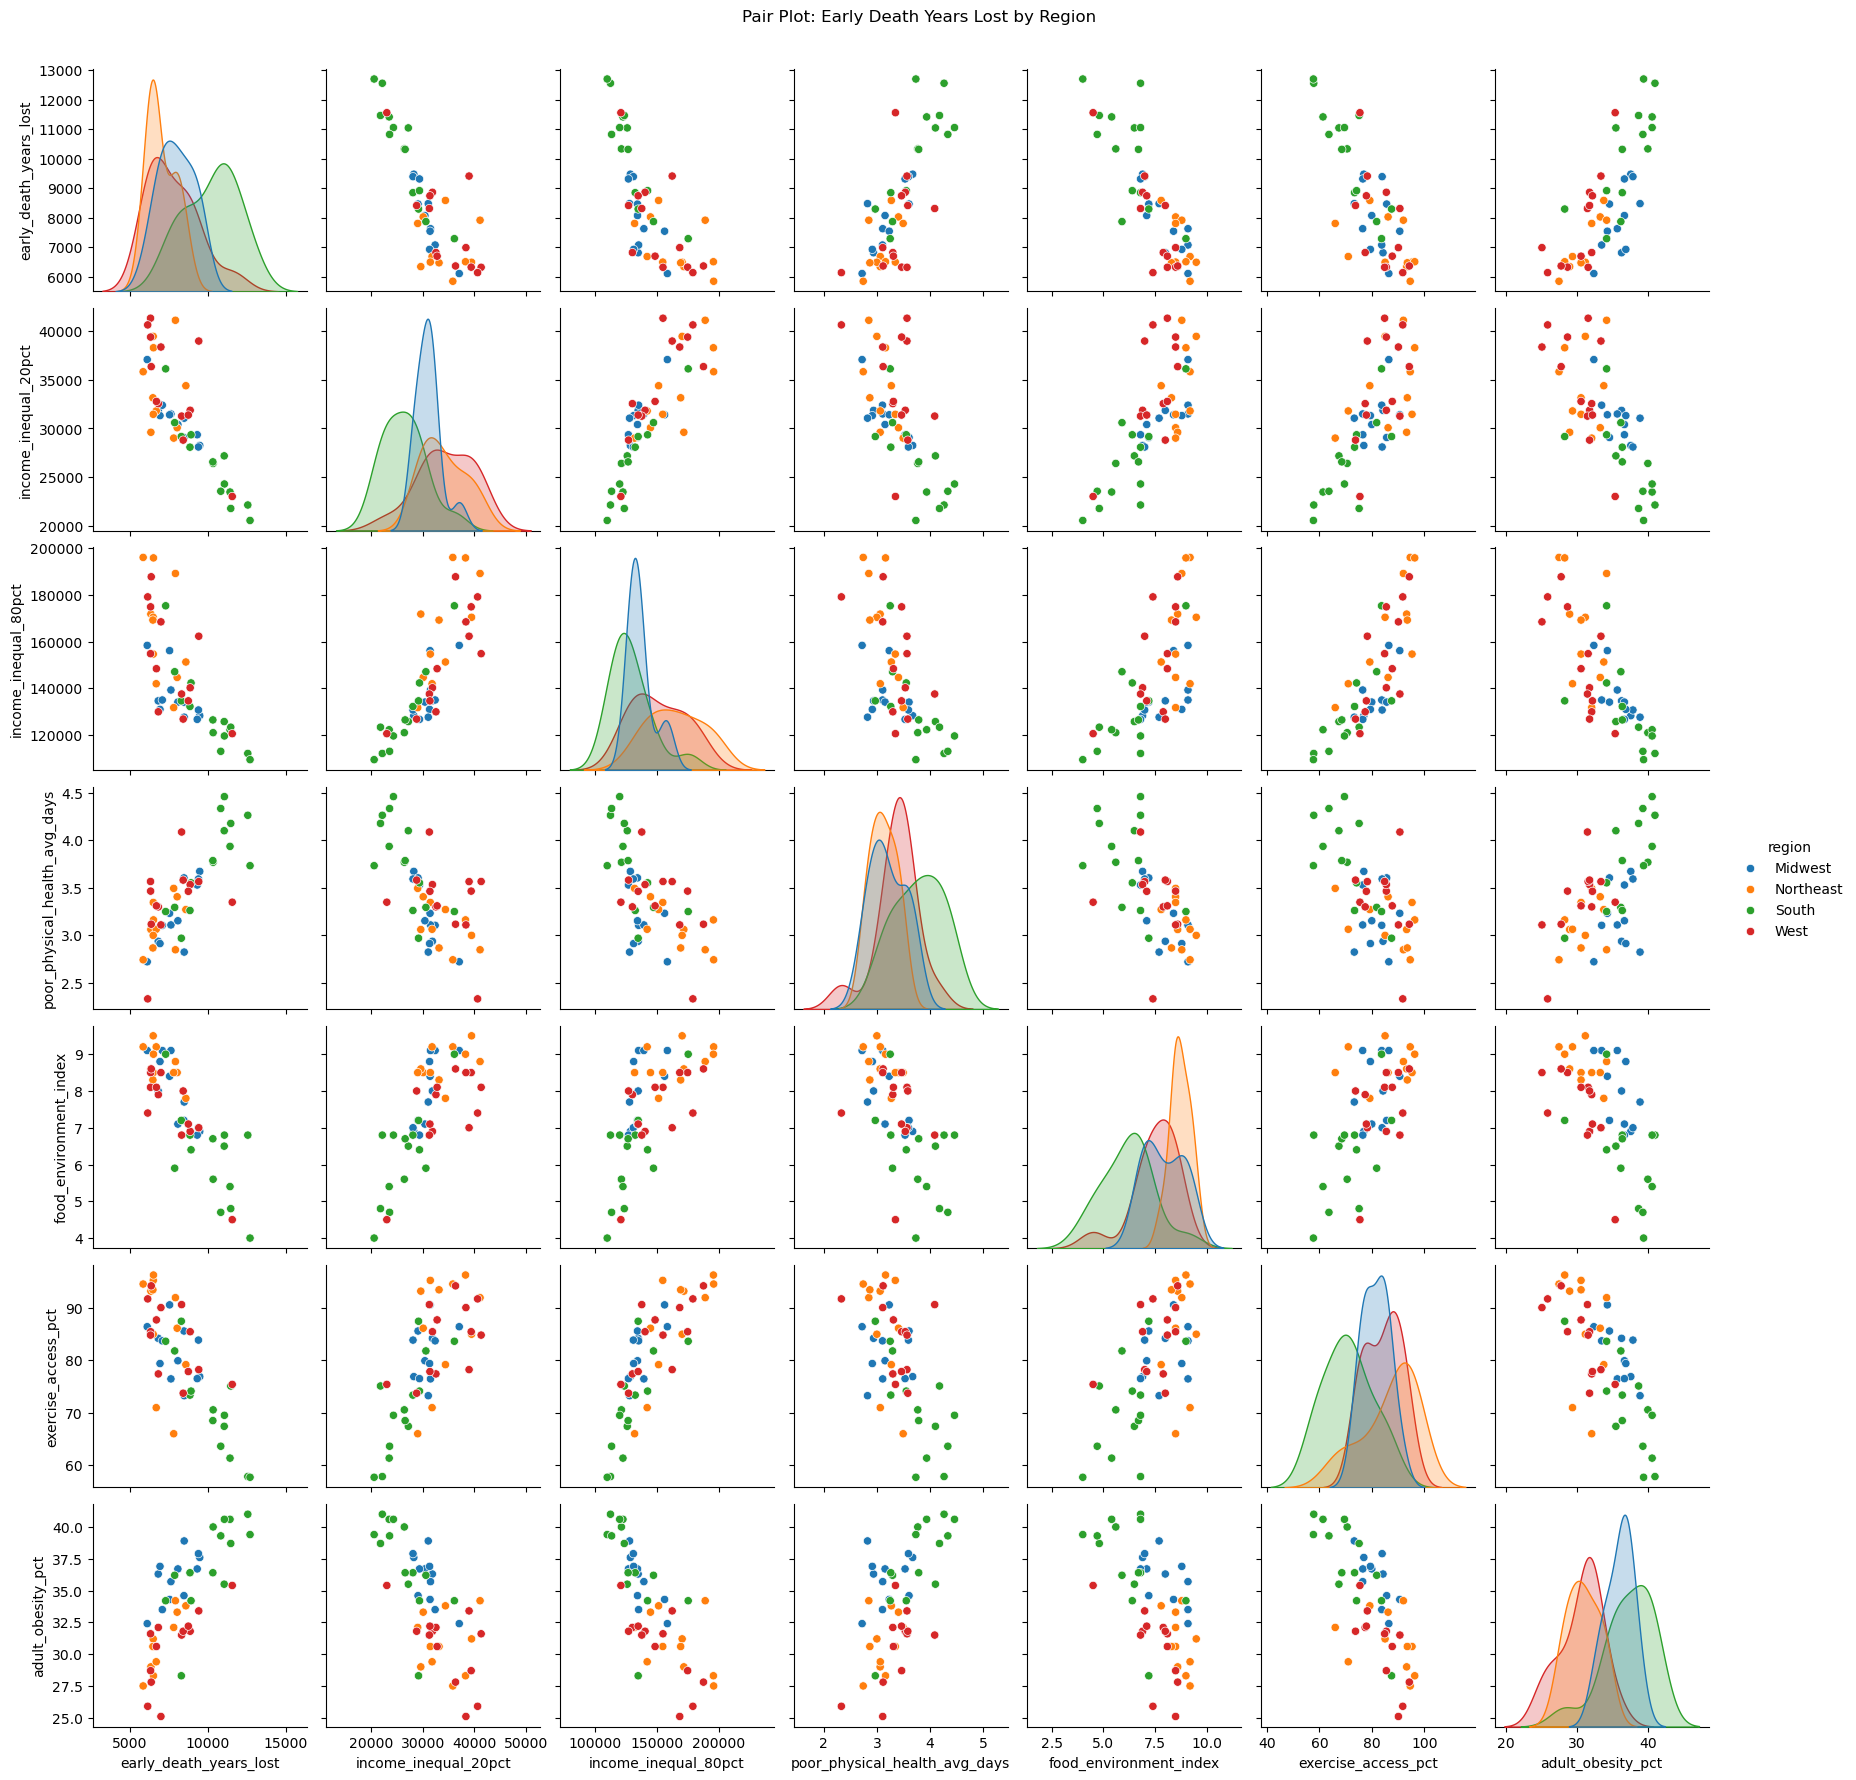

In [89]:
sns.pairplot(region_df, hue='region', vars=['early_death_years_lost', 'income_inequal_20pct',
    'income_inequal_80pct',
    'poor_physical_health_avg_days',
    'food_environment_index',
    'exercise_access_pct',
    'adult_obesity_pct'])
plt.suptitle('Pair Plot: Early Death Years Lost by Region', y=1.02)
plt.show()

**POTENTIAL QUESTIONS**

- How does median household income relate to early death years lost in different regions?
- How do lifestyle choices like excess drinking and smoking correlate with early death years lost?
- How does poor physical health and poor mental health relate to early death years lost?
